In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


In [24]:
path = r"C:\Users\ahmed\Downloads\image.png"
org = cv2.imread(path)

In [25]:
cv2.imshow('Original Blurred Image Sample',org)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
image_yuv = cv2.cvtColor(org, cv2.COLOR_BGR2YUV)

min = np.min(image_yuv[:,:,0])
max = np.max(image_yuv[:,:,0])

for i in range(org.shape[0]):
    for j in range(org.shape[1]):
        image_yuv[:,:,0][i,j] = 255*(image_yuv[:,:,0][i,j]-min)/(max-min)

csimg = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

In [27]:
cv2.imshow("Contrast Stretched Image", csimg)
cv2.waitKey(0)
cv2.destroyAllWindows() 

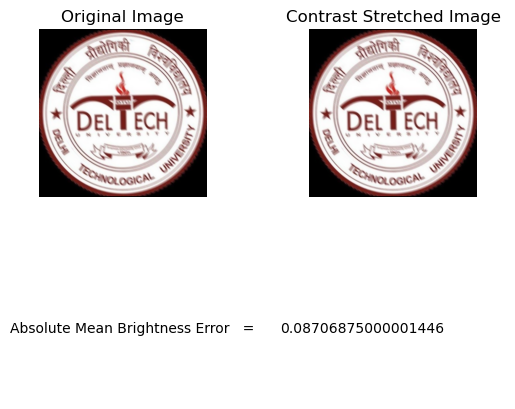

In [43]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(org, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(csimg, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Contrast Stretched Image')

axs[1,0].axis('off')
axs[1,0].text(0,0.4,'Absolute Mean Brightness Error   = ')

axs[1,1].axis('off')
axs[1,1].text(0,0.4,AMBE)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [44]:
gsorg = cv2.cvtColor(org, cv2.COLOR_BGR2GRAY)
cv2.imshow("Original Grey Scale Image", gsorg)
cv2.waitKey(0)
cv2.destroyAllWindows() 


In [20]:
gscsimg = cv2.cvtColor(csimg, cv2.COLOR_BGR2GRAY)
cv2.imshow("Contrast Stretched Grey Scale Image", gscsimg)
cv2.waitKey(0)
cv2.destroyAllWindows() 

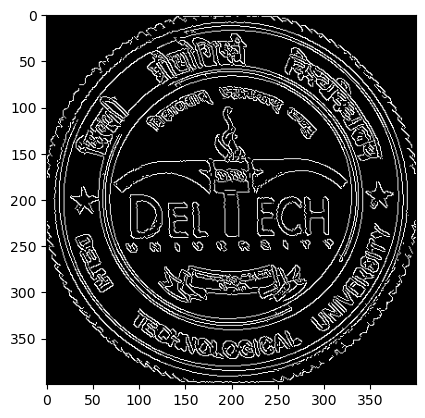

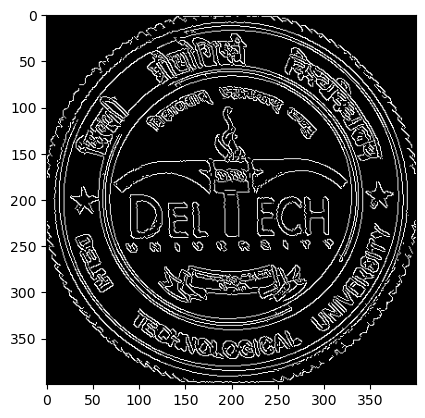

In [51]:
edges_org = cv2.Canny(gsorg, threshold1=30, threshold2=100)
edges_csimg = cv2.Canny(gscsimg, threshold1=30, threshold2=100)
plt.imshow(edges_org, cmap="gray")
plt.show()
plt.imshow(edges_csimg, cmap="gray")
plt.show()


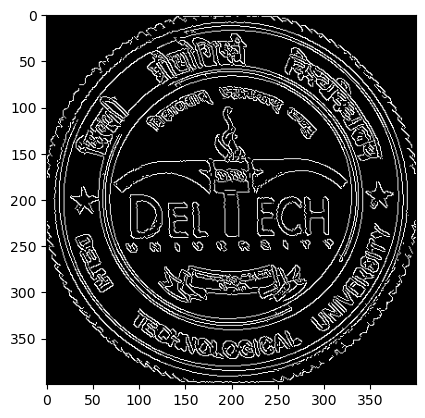

In [52]:
final_edges = edges_org + edges_csimg
plt.imshow(final_edges, cmap="gray")
plt.show()
